# Load data

In [2]:
from datasets import load_dataset

ds = load_dataset("fancyzhx/ag_news")

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})

{'train': ['text', 'label'], 'test': ['text', 'label']}

In [21]:
train_ds = ds["train"]
test_ds = ds["test"]


In [22]:
index_to_label = {0: "World", 1: "Sports", 2: "Business", 3: "Sci_Tech"}

In [23]:
train_df = train_ds.to_pandas()
test_df = test_ds.to_pandas()

In [24]:
train_df.head()

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2


In [25]:
train_df['text_label'] = train_df['label'].map(index_to_label)
test_df['text_label'] = test_df['label'].map(index_to_label)

In [26]:
train_df.head()

,text,label,text_label
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business


# Save data

In [29]:
def save_dataset(df, filename):
    cnt = [0 for i in range(4)]
    for idx, row in df.iterrows():
        text = row["text"]
        label = row["text_label"]
        int_label = row["label"]
        
        #save with format: label + idx + .txt 
        with open(f"{filename}/{label}{cnt[int_label]}.txt", "w") as f:
            f.write(text)
        cnt[int_label] += 1

In [30]:
save_dataset(train_df, "../data2/train")

In [31]:
save_dataset(test_df, "../data2/test")

In [46]:
train_df.to_csv("../data2/train.csv", index=False)

In [47]:
test_df.to_csv("../data2/test.csv", index=False)

# Data analysis

## Length

In [32]:
len(train_df)

120000

In [33]:
len(test_df)

7600

## Class distribution

<Axes: xlabel='text_label'>

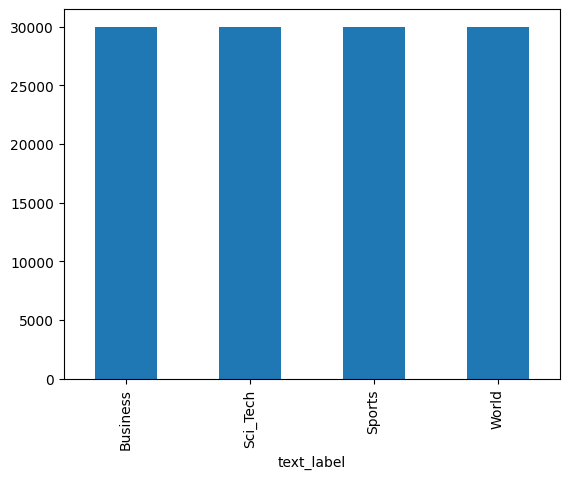

In [34]:
train_df['text_label'].value_counts().plot(kind='bar')

<Axes: xlabel='text_label'>

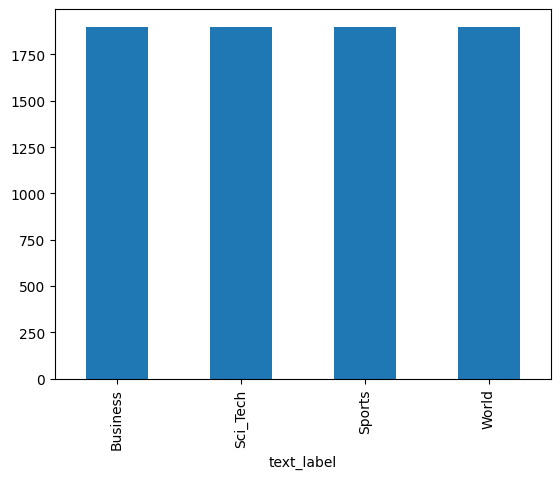

In [35]:
test_df['text_label'].value_counts().plot(kind='bar')

## Sample length distribution

In [40]:
train_df['text'].apply(lambda x: len(x.split(" "))).describe()

count    120000.000000
mean         38.418725
std          10.518747
min           9.000000
25%          32.000000
50%          38.000000
75%          44.000000
max         197.000000
Name: text, dtype: float64

<Axes: ylabel='Frequency'>

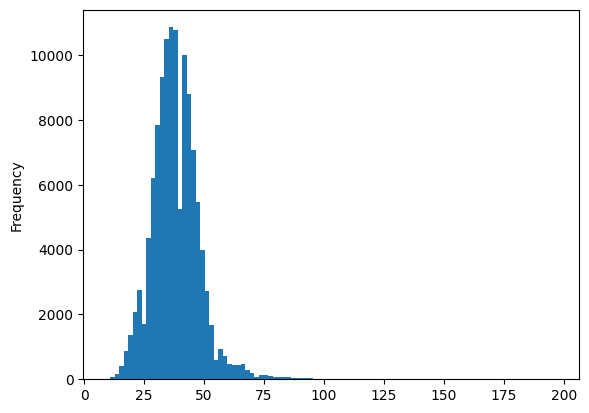

In [38]:
train_df['text'].apply(lambda x: len(x.split(" "))).plot(kind='hist', bins=100)

In [41]:
test_df['text'].apply(lambda x: len(x.split(" "))).describe()

count    7600.000000
mean       38.278816
std        10.564637
min        11.000000
25%        32.000000
50%        38.000000
75%        44.000000
max       149.000000
Name: text, dtype: float64

<Axes: ylabel='Frequency'>

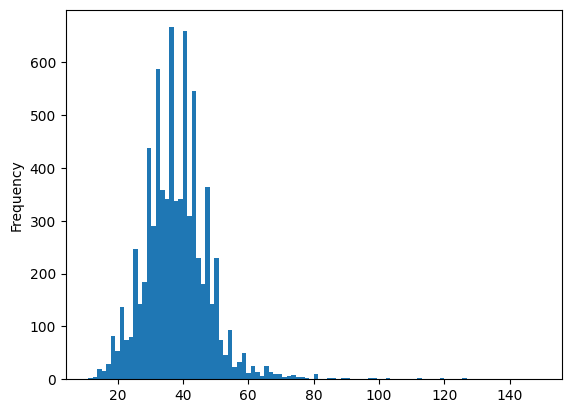

In [42]:
test_df['text'].apply(lambda x: len(x.split(" "))).plot(kind='hist', bins=100)

## Some example

In [44]:
train_df.iloc[100].text

'Comets, Asteroids and Planets around a Nearby Star (SPACE.com) SPACE.com - A nearby star thought to harbor comets and asteroids now appears to be home to planets, too. The presumed worlds are smaller than Jupiter and could be as tiny as Pluto, new observations suggest.'

In [45]:
train_df.iloc[100].text_label

'Sci_Tech'